### Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sber_data = pd.read_csv('data/sber_data.csv')

In [2]:
display(sber_data.head())
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


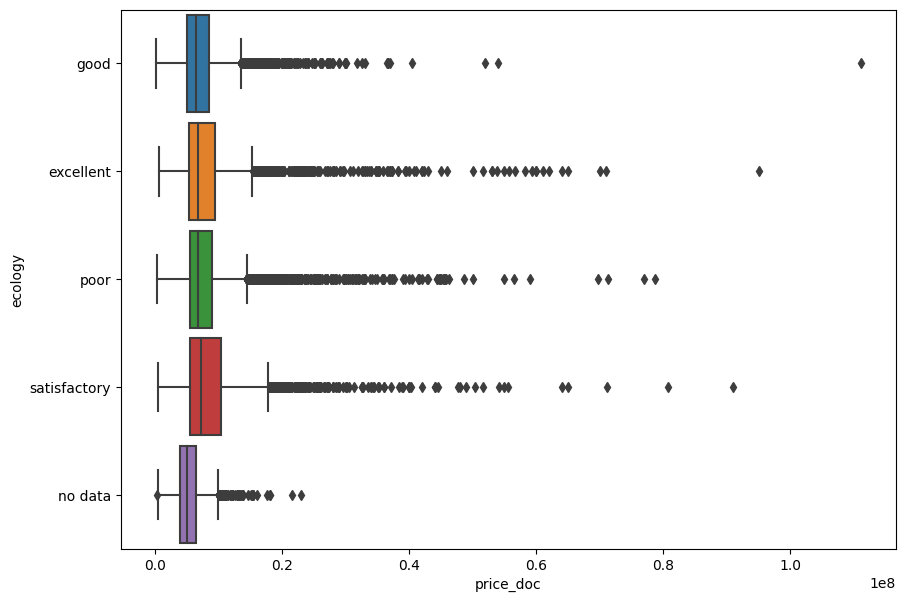

In [3]:
sber_data['sub_area'].nunique()
sber_data['price_doc'].max()

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data = sber_data,
    y = 'ecology',
    x = 'price_doc',
    width=0.9
)

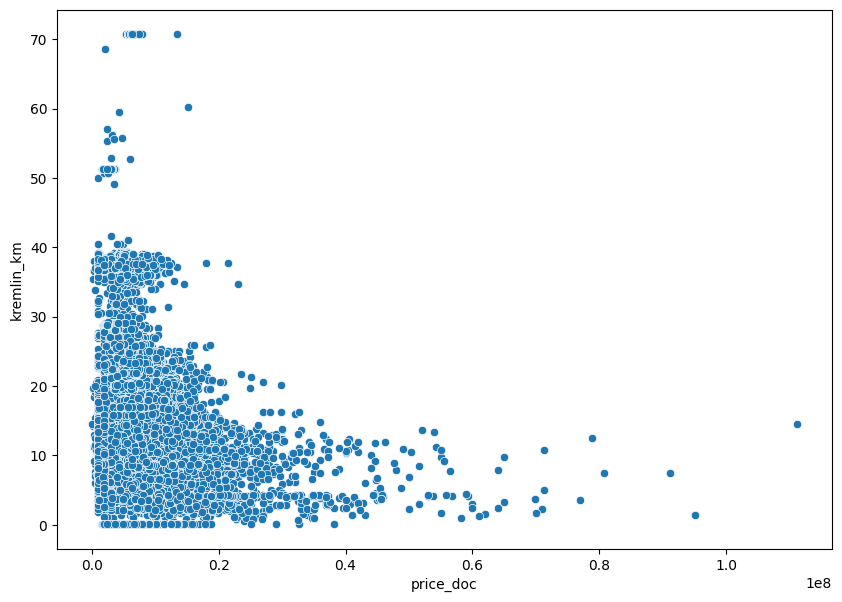

In [4]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.scatterplot(
    data = sber_data,
    y = 'kremlin_km',
    x = 'price_doc'
)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

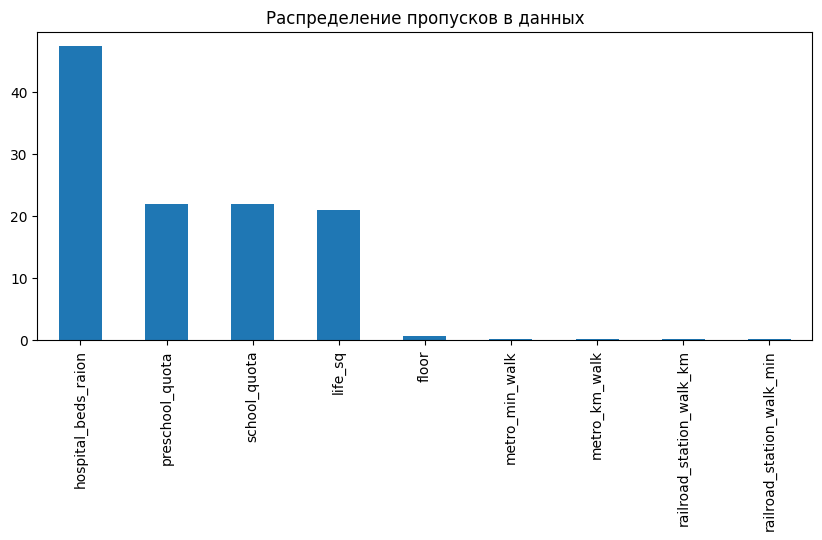

In [5]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

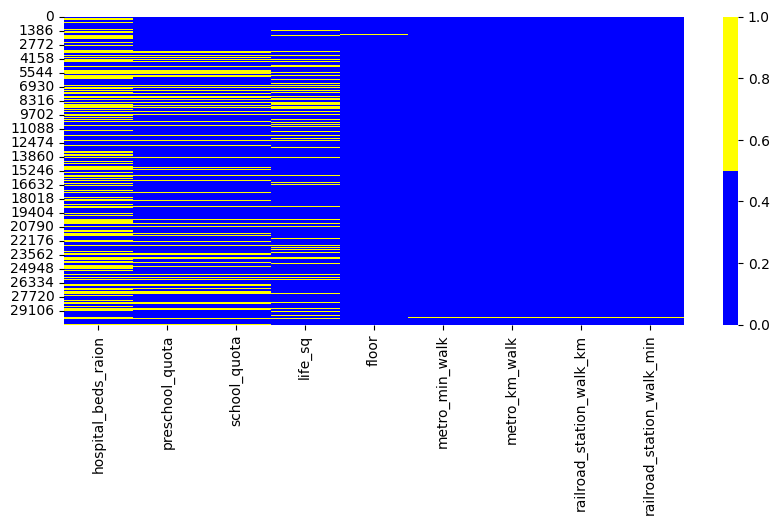

In [6]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [7]:
drop_data = sber_data.copy()
thresh = drop_data.shape[0] * 0.7
drop_data = drop_data.dropna(thresh=thresh, axis=1)
drop_data = drop_data.dropna(how='any', axis=0)
# drop_data.isnull().mean()


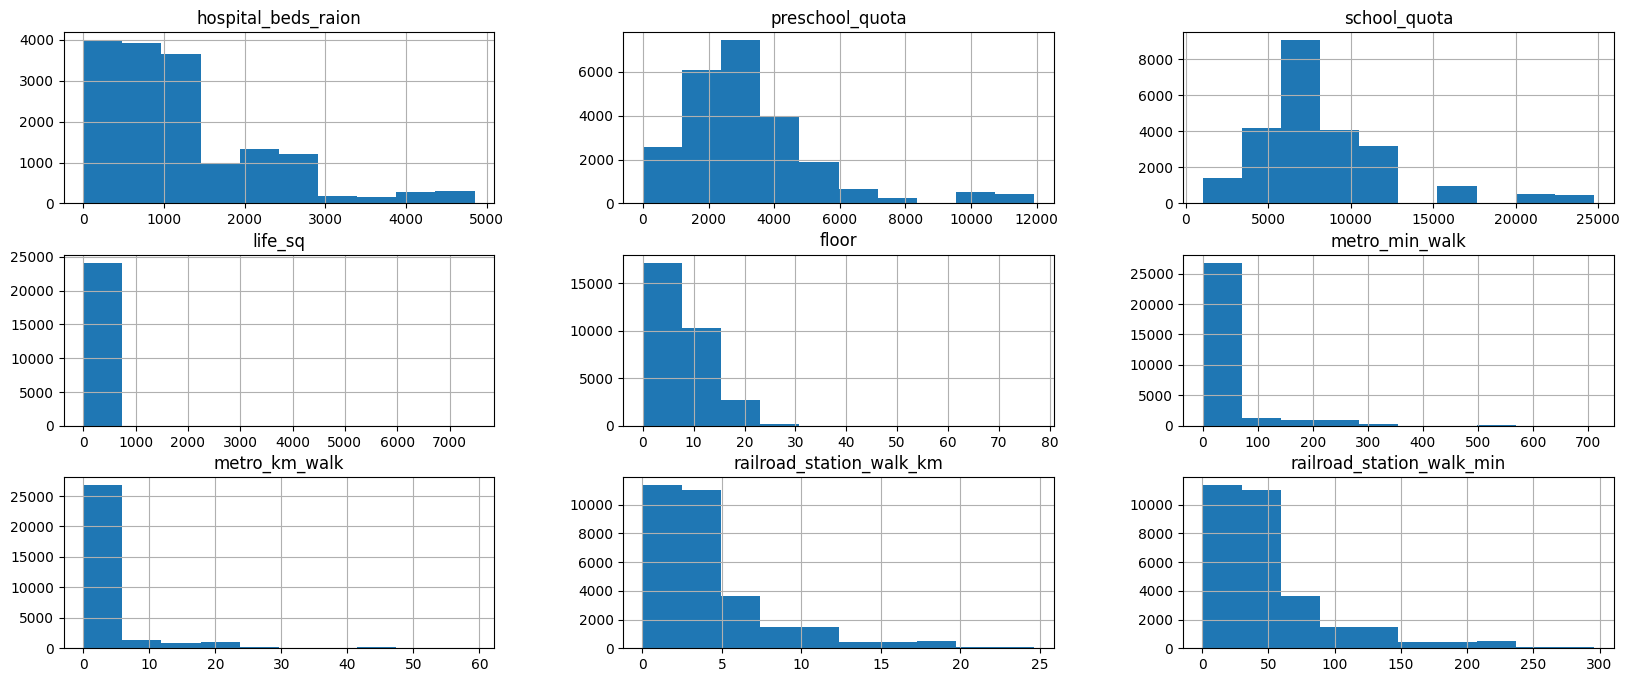

In [8]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

In [9]:
fill_data = sber_data.copy()
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion':fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}

fill_data = fill_data.fillna(values)

fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

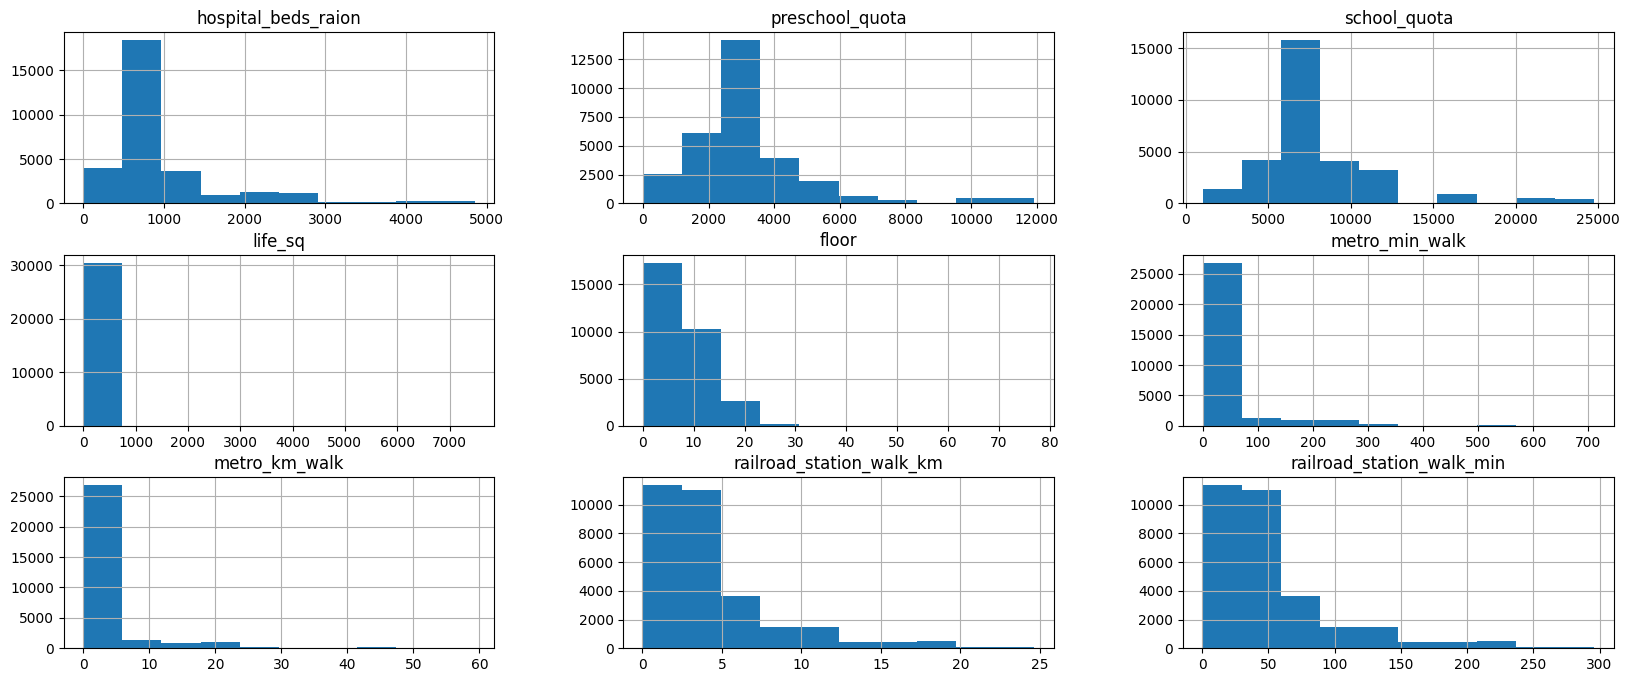

In [10]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

In [11]:
indicator_data = sber_data.copy()

for col in cols_with_null.index:
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
    
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railorad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0] 
}

indicator_data = indicator_data.fillna(values)
indicator_data.isnull().mean()

# indicator_data.head()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

In [12]:
combine_data = sber_data.copy()

n = combine_data.shape[0]
thresh = n * 0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

m = combine_data.shape[1]
combine_data = combine_data.dropna(thresh=m-2, axis=0)

values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}

combine_data = combine_data.fillna(values)

# display(combine_data.isnull().mean())

# print(combine_data.shape)

In [13]:
sber_data['life_sq'].describe()
print(sber_data[sber_data['life_sq'] == 0].shape[0])
display(sber_data[sber_data['life_sq'] > 7000])

outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

cleaned = sber_data.drop(outliers.index, axis=0)

print(f'Total entries: {cleaned.shape[0]}')

45


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


37
Total entries: 30434


In [14]:
display(sber_data['floor'].describe())
display(sber_data[sber_data['floor']> 50])

outliers2 = sber_data[sber_data['floor']> 50]

cleaned2 = sber_data.drop(outliers2.index, axis=0)
print(f'Total entries: {cleaned2.shape[0]}')


count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Total entries: 30470


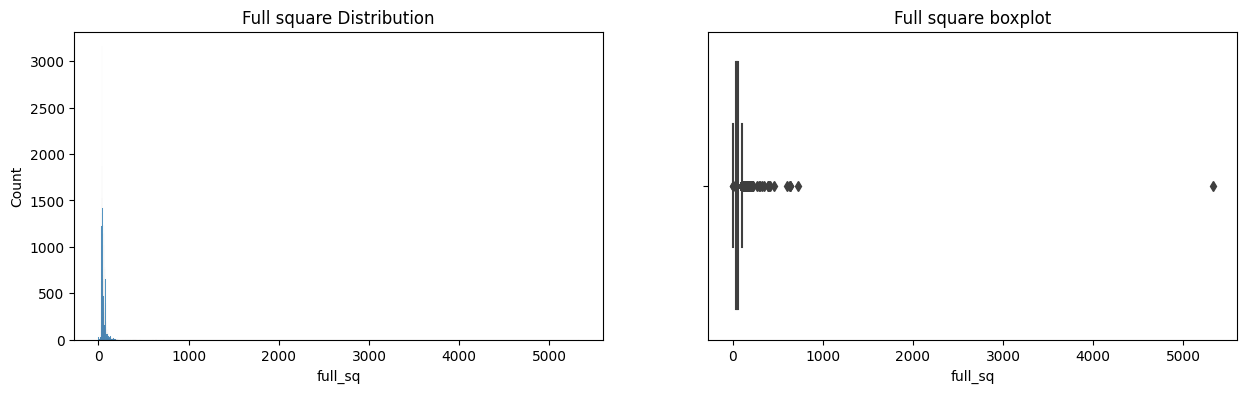

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full square boxplot');

In [16]:
import ds_functions as dsf


outliers, cleaned = dsf.outliers_iqr(sber_data, 'full_sq')

print(f'Tjuki outliers number:{outliers.shape[0]}')
print(f'Tjuki-cleaned df:{cleaned.shape[0]}')

Tjuki outliers number:963
Tjuki-cleaned df:29508


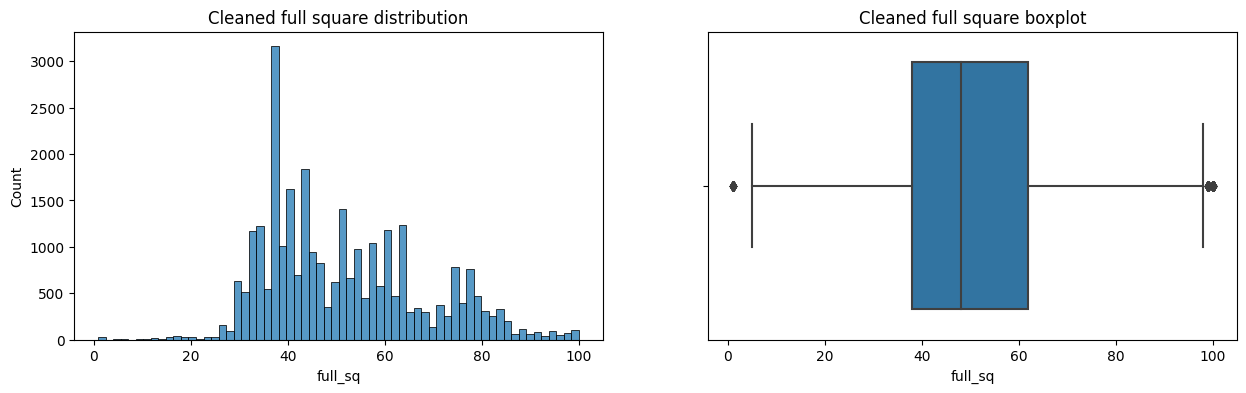

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned full square distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned full square boxplot');


In [18]:
import ds_functions as dsf


outliers, cleaned = dsf.outliers_iqr_mod(sber_data, 'full_sq', 1, 6)

print(f'Tjuki outliers number:{outliers.shape[0]}')
print(f'Tjuki-cleaned df:{cleaned.shape[0]}')

Tjuki outliers number:59
Tjuki-cleaned df:30403


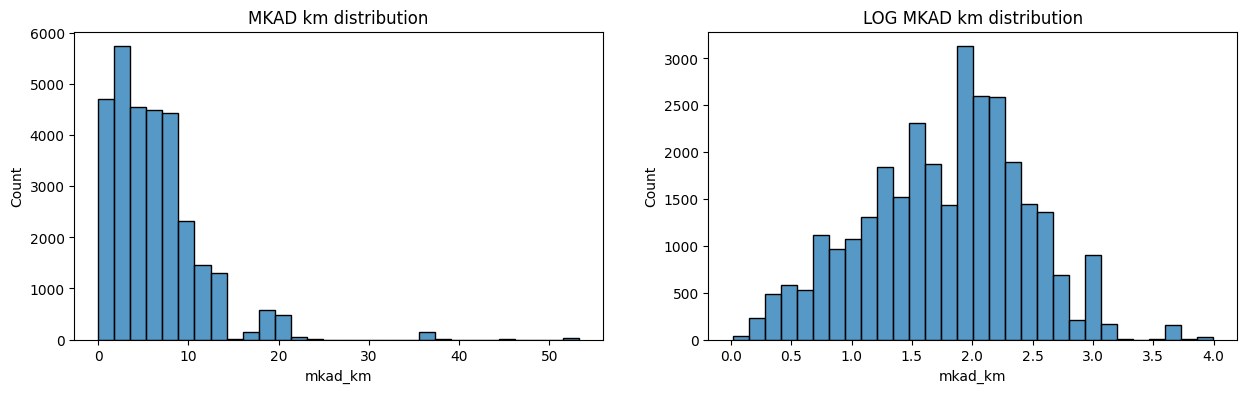

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Source Histogram

histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD km distribution');

# LOG histogram

log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])

histplot.set_title('LOG MKAD km distribution');


In [20]:
outliers, cleaned = dsf.outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Z scale outliers:{outliers.shape[0]}')
print(f'Z shape cleaned df:{cleaned.shape[0]}')

print(outliers['sub_area'].unique())

Z scale outliers:33
Z shape cleaned df:30438
['Poselenie Rogovskoe' 'Poselenie Kievskij']


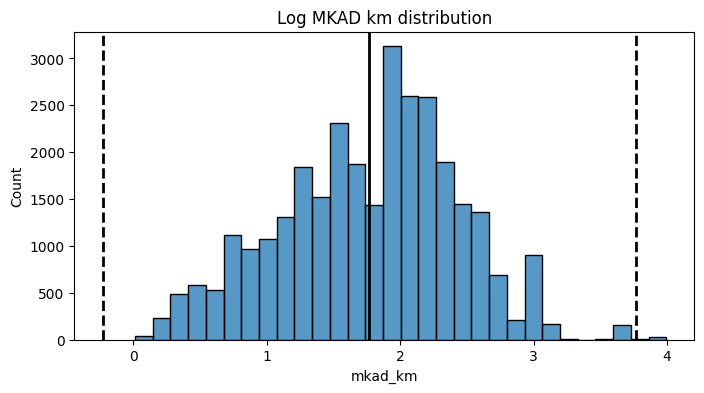

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean() + 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean() - 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD km distribution');

In [22]:
outliers, cleaned = dsf.outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
print(f'Z scale outliers:{outliers.shape[0]}')
print(f'Z shape cleaned df:{cleaned.shape[0]}')

Z scale outliers:0
Z shape cleaned df:30471


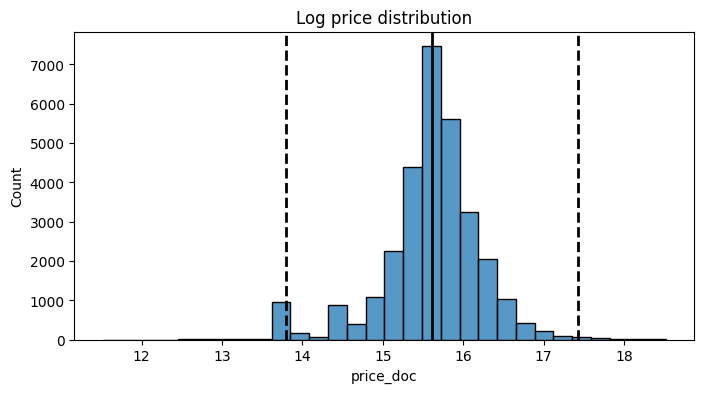

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean() + 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean() - 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price distribution');

In [25]:
outliers, cleaned = dsf.outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
print(f'Z scale outliers:{outliers.shape[0]}')
print(f'Z shape cleaned df:{cleaned.shape[0]}')

Z scale outliers:52
Z shape cleaned df:30419
